# 01 – Data Exploration

Load the dataset, inspect basic distributions, class balance, and visualize correlations.

In [1]:
# 1.1 – Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Ensure consistent styling and reproducibility
sns.set_style('whitegrid')
RANDOM_SEED = 31

> **Notes:**
>
> * Added a constant `RANDOM_SEED` so that all subsequent sampling or random processes can be reproducible.
> * Imported `PCA` to run PCA before t-SNE to speed it up (recommended for large feature spaces).

In [2]:
# 1.2 – Load dataset

# Adjust path if necessary; ensure 'creditcard.csv' is in ../data/
df = pd.read_csv('creditcard.csv')

# Display first few rows to confirm successful loading
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1.3 – Basic Info
### - Shape, dtypes, missing values
### - Class distribution

In [5]:
# Inspect shape, column data types, and missing values
print(f"Dataset shape: {df.shape}\n")


Dataset shape: (284807, 31)



In [7]:
print("Column data types and non-null counts:")
print(df.info(), "\n")

Column data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     2

In [9]:
# Display class balance
class_counts = df['Class'].value_counts()
print("Transaction class distribution:")
print(class_counts)

Transaction class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [11]:
# (Optional) percentage breakdown
print("\nPercentage breakdown:")
print((class_counts / len(df) * 100).round(3))


Percentage breakdown:
Class
0    99.827
1     0.173
Name: count, dtype: float64


# 1.4 – Visualize Class Imbalance and Amount Distribution

## 1.4.a – Bar plot for class imbalance

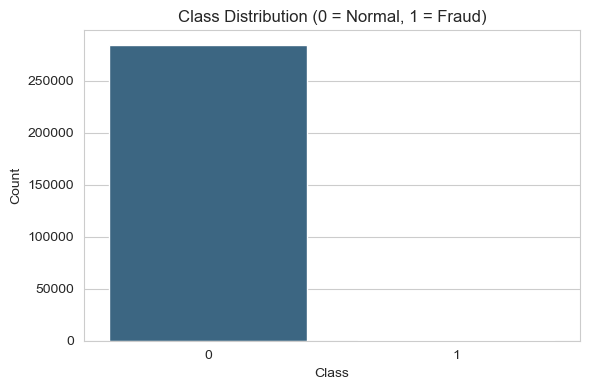

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 1.4.b – Boxplot of Amount by Class

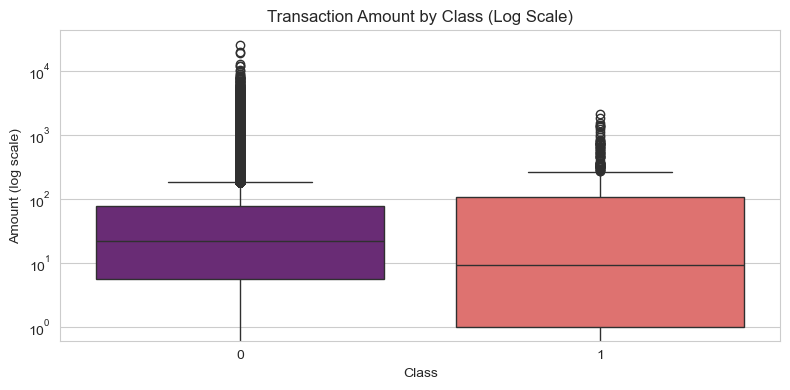

In [15]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df, palette='magma')
plt.yscale('log')  # Transaction amounts are heavily right-skewed
plt.title('Transaction Amount by Class (Log Scale)')
plt.xlabel('Class')
plt.ylabel('Amount (log scale)')
plt.tight_layout()
plt.show()


> **Notes:**
>
> * Using a log scale on the y-axis helps visualize the long tail of transaction amounts. Since the data is heavily skewed


# 1.5 – Correlation Heatmap

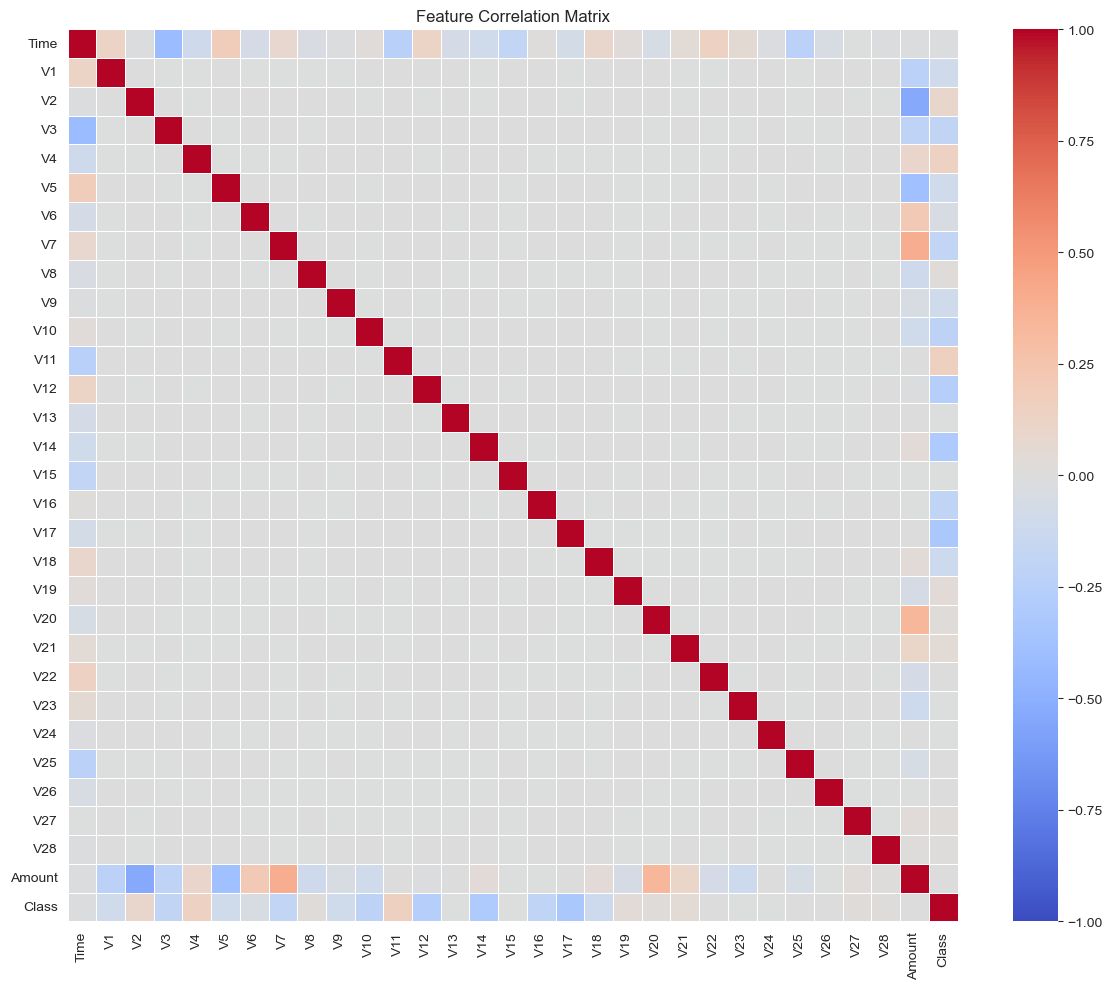

In [17]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap (for all features; may be slow if many columns)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 1.6 – Dimensionality Reduction Visualization (PCA + t-SNE)

## 1.6.a – Take a balanced sample for visualization

In [19]:
# Since the dataset is highly imbalanced, sample any 3,000 normal and all fraud cases (if fewer)
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0].sample(n=3000, random_state=RANDOM_SEED)

viz_df = pd.concat([fraud_df, normal_df], axis=0)
features = viz_df.drop(columns=['Class'])
labels = viz_df['Class']


## 1.6.b – Standardize or scale 'Amount' and 'Time' since others are already scaled

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = features.copy()
features_scaled[['Time', 'Amount']] = scaler.fit_transform(features[['Time', 'Amount']])

## 1.6.c – Optional: PCA to reduce dimensionality before t-SNE

In [23]:
pca = PCA(n_components=0.90, random_state=RANDOM_SEED)  # retain 90% variance
pca_features = pca.fit_transform(features_scaled)

print(f"PCA reduced data to {pca_features.shape[1]} dimensions (90% variance).")

PCA reduced data to 11 dimensions (90% variance).


## 1.6.d – Run t-SNE on PCA-reduced data

In [25]:
tsne = TSNE(n_components=2, random_state=RANDOM_SEED, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(pca_features)


## 1.6.e – Plot t-SNE results

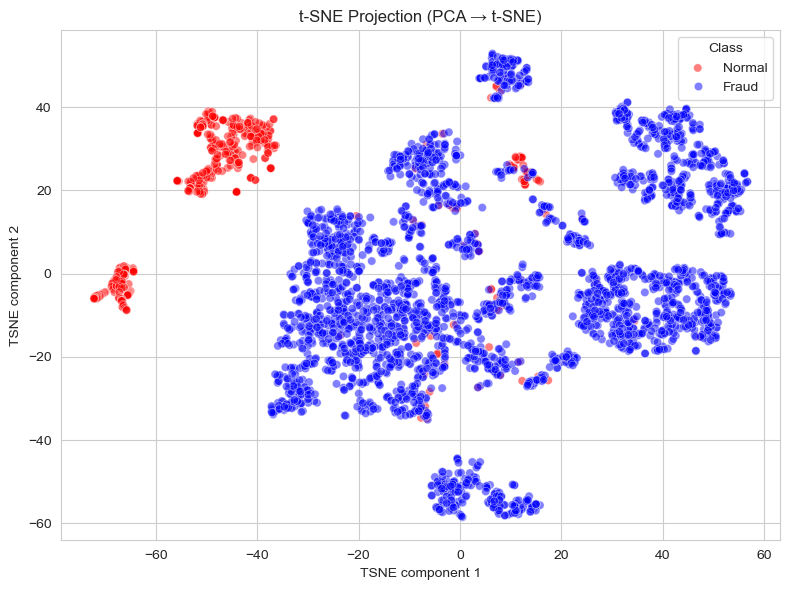

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=labels,
    palette={0: 'blue', 1: 'red'},
    alpha=0.5,
    legend='brief'
)
plt.title('t-SNE Projection (PCA → t-SNE)')
plt.xlabel('TSNE component 1')
plt.ylabel('TSNE component 2')
plt.legend(title='Class', labels=['Normal', 'Fraud'])
plt.tight_layout()
plt.show()

> **Explanation:**
>
> 1. **Sampling Strategy:** We sampled all fraud records (since they are few) plus 5,000 normal records to create a more balanced subset for visualization.
> 2. **Scaling:** Because the original “V1…V28” features are already scaled via PCA on the original dataset, we only standardized “Time” and “Amount” before PCA/t-SNE.
> 3. **PCA Preprocessing:** Running t-SNE on all 30 dimensions is slow; PCA to \~90 % variance typically reduces to \~15–20 components (you’ll see the printed dimension), which speeds up t-SNE and often preserves more global structure.
> 4. **t-SNE Parameters:** Feel free to adjust `perplexity` and `n_iter` depending on convergence/time. Lowering `perplexity` or `n_iter` can speed it up but might degrade the clarity of clusters.
> 5. **Interpretation:** If fraud points (red) form a distinct cluster or inhabit a specific region, that suggests separability. If they are intermingled, consider different features or higher-level embeddings.
